<a name="top"></a>
# Introduction to Python Programming for Bioinformatics. Lesson 12

<details>
<summary>
About this notebook
</summary>

This notebook was originally written by [Marc Cohen](https://github.com/mco-gh), an engineer at Google. The original source can be found on [Marc's short link service](https://mco.fyi/), and starts with [Python lesson 0](https://mco.fyi/py0), and I encourage you to work through that notebook if you find some details missing here.

Rob Edwards edited the notebook, adapted it for bioinformatics, using some simple geneticy examples, condensed it into a single notebook, and rearranged some of the lessons, so if some of it does not make sense, it is Rob's fault!

It is intended as a hands-on companion to an in-person course, and if you would like Rob to teach this course (or one of the other courses) don't hesitate to get in touch with him.

</details>
<details>
<summary>
Using this notebook
</summary>

You can download the original version of this notebook from [GitHub](https://linsalrob.github.io/ComputationalGenomicsManual/Python/Python_Lesson_9.ipynb) and from [Rob's Google Drive]()

**You should make your own copy of this notebook by selecting File->Save a copy in Drive from the menu bar above, and then you can edit the code and run it as your own**

There are several lessons, and you can do them in any order. I've tried to organise them in the order I think most appropriate, but you may disagree!

</details>

<a name="lessons"></a>
# Lesson Links

* [Lesson 12 - Plotting data with Pandas and Seaborn](#Lesson-12---Plotting-data-with-Pandas-and-Seaborn)

Previous Lesson: [GitHub](Python_Lesson_11.ipynb) | [Google Colab](https://colab.research.google.com/drive/1N2WL7WDjUQkb7BLWqKYALWCwsUEAVVdf)

Next Lesson: GitHub | Google Colab

<!-- #region id="qXu_bY7yPpsS" -->

# Lesson 12 - Pandas and Seaborn

There are a few essential libraries for data analysis that we always use.

<details>
<summary>
numpy
</summary>
The name "NumPy" stands for "Numerical Python." It reflects the library's primary purpose of providing support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays. NumPy is fundamental to scientific computing in Python, and its name succinctly captures its focus on numerical operations in Python.
</details>
<details>
<summary>
matplotlib
</summary>
The name "matplotlib" is a combination of "MATLAB" and "plotting." The library's creator, John D. Hunter, developed matplotlib as a Python alternative to MATLAB, which is a proprietary software used for numerical computing and data visualization. By combining "MATLAB" with "plot," Hunter aimed to create a library that offered similar functionality for generating plots and graphs in Python. Thus, the name "matplotlib" reflects its purpose and inspiration from MATLAB's plotting capabilities.
</details>
<details>
<summary>
pandas
</summary>
The name "pandas" is derived from the term "panel data," which refers to multidimensional data involving measurements over time. The original author of the library, Wes McKinney, chose the name to reflect its intended use for data analysis and manipulation, particularly for time series and cross-sectional data. The name is also a playful nod to the pandas bear, as it is an easy-to-remember and friendly-sounding name for the library.
</details>
<details>
<summary>
seaborn
</summary>
The name "seaborn" is inspired by the natural world, specifically the ocean. The creator of the library, Michael Waskom, chose the name as a nod to the marine theme, which is reflected in the library's aesthetic design and color palettes. Seaborn is built on top of matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics. The name aims to evoke a sense of beauty and simplicity in visualizing data, much like the serene and vast nature of the sea.
</details>

Normally, we use `pandas` and `seaborn` as they are "high-level" languages, and then we lean on `numpy` and `matplotlib` when we have to.

> **Top tip:** Use AI (Gemini, ChatGPT, Copilot) to show you how to do things using `pandas` and `seaborn`. They all have mad skillz

<!-- # endregion -->


### Pandas

We use pandas to read in a dataframe and manipulate it. You can slice data, change data, and filter the frame.

In this example, we are going to plot the average RPKM for a few phages in different environments.

First, let's import our library. Notice here we are using abbreviations for the different libraries (even though I said don't use two letter variable names!)

These are really standard abbreviations, and pretty much every help document you see will use the same ones.

## Seaborn

Seaborn provides well thought out default options, but you can also specify lots of different variants on colours, themes, and so on. I also rely a lot on the example graphs that you can plot with seaborn to give ideas for data visualisation.

* [example graph options](https://seaborn.pydata.org/examples/index.html)
* [seaborn themes](http://seaborn.pydata.org/tutorial/aesthetics.html)
* [seaborn colour palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [seaborn tutorial](https://seaborn.pydata.org/tutorial.html)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now let's open the data file and see what's there. You can [download the data from GitHub](https://github.com/linsalrob/ComputationalGenomicsManual/raw/master/Python/BcSamples.tsv.gz) and upload it to Google Colab by dropping it in the file space to the left like we did before. However, here we are accessing the file directly from GitHub into Pandas and so you don't need to do that step!

Notice that once again this file is `gzip` compressed, and we can just open that using `pandas`

In [52]:
# If you want to upload the file, uncomment the next line and comment out the line that gets the file from GitHub
# df = pd.read_csv("BcSamples.tsv.gz", sep="\t", compression='gzip')
df = pd.read_csv("https://github.com/linsalrob/ComputationalGenomicsManual/raw/master/Python/BcSamples.tsv.gz", sep="\t", compression='gzip')
df

,Project,Run,Phage,RPK
0,ERP104208,ERR1801634,Bc01,0.08925
1,ERP104208,ERR1801632,Bc01,0.09917
2,ERP104208,ERR1801633,Bc01,0.07933
3,ERP104208,ERR1801631,Bc01,0.02975
4,ERP104208,ERR1801630,Bc01,0.04958
...,...,...,...,...
3409,ERP024424,ERR867719,Bc11,0.00000
3410,ERP024424,ERR867918,Bc11,0.00000
3411,ERP024424,ERR771101,Bc11,2.42900
3412,ERP024424,ERR867715,Bc11,0.00000


In this data frame, we have mapped reads from different `Runs` against our phage genomes. The runs come from the SRA, and the [SRA Metadata is described here](https://edwards.flinders.edu.au/sra-metadata/). (_Note_: because these samples all start EXX they actually come from the ENA not the SRA!)

The key point is:

> A project (ERP) has one or more samples. </br>
> A sample (ERS) has one or more experiments (ERX).</br>
> An experiment has one or more runs (ERR).


### Step 1.

Let's group all the phage and the projects and calculate the average RPK (reads per kb) for each sample.

In [ ]:
average_rpk = df.groupby(['Project', 'Phage'])['RPK'].mean().reset_index()
average_rpk

,Project,Phage,RPK
0,ERP024424,Bc01,0.003211
1,ERP024424,Bc03,0.003613
2,ERP024424,Bc11,0.489940
3,ERP104038,Bc01,0.042602
4,ERP104038,Bc03,0.018123
5,ERP104038,Bc11,0.005435
6,ERP104039,Bc01,3.338288
7,ERP104041,Bc01,0.000000
8,ERP104041,Bc03,0.000000
9,ERP104041,Bc11,0.000000


Here, we make a violin plot of our data, which just checks to see if our distributions per phage are correct.

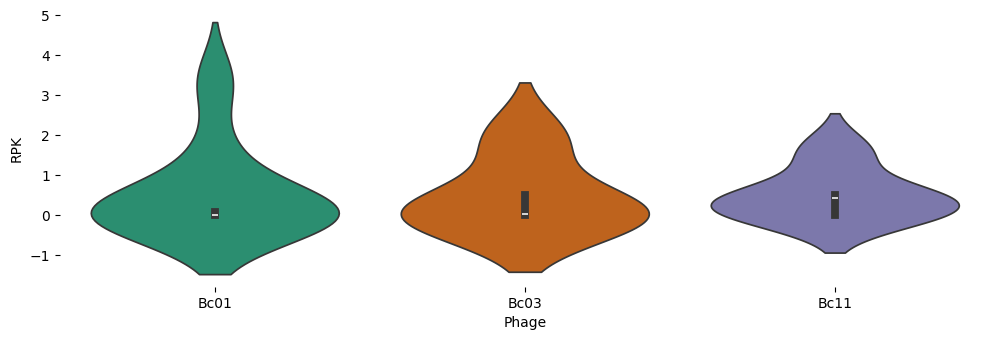

In [ ]:
figsize = (12, 1.2 * len(average_rpk['Phage'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(x='Phage', y='RPK', hue='Phage', data=average_rpk, palette='Dark2', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)

Next, lets read the metadata file, also using pandas. Again, feel free to [download the metadata file](https://github.com/linsalrob/ComputationalGenomicsManual/raw/master/Python/metadata.tsv.gz) and upload it, or you can just let Pandas deal with that.

In [53]:
# If you want to upload the file, uncomment the next line and comment out the line that gets the file from GitHub
# metadata = pd.read_csv("metadata.tsv.gz", sep="\t", compression='gzip')
metadata = pd.read_csv("https://github.com/linsalrob/ComputationalGenomicsManual/raw/master/Python/metadata.tsv.gz", sep="\t", compression='gzip')
metadata

,Project,Secondary ID,Study Title,Study Abstract,Biome
0,ERP104207,PRJEB22526,EMG produced TPA metagenomics assembly of the ...,The Molecular study on Haloarchaea Third Party...,Aquatic
1,ERP105558,PRJEB23780,EMG produced TPA metagenomics assembly of the ...,The Phytase Third Party Annotation (TPA) assem...,Birds
2,ERP104204,PRJEB22523,EMG produced TPA metagenomics assembly of the ...,The Metagenomics of a radioactive legacy site ...,Freshwater
3,ERP104197,PRJEB22516,EMG produced TPA metagenomics assembly of the ...,The Ecosystem functions in cryoconites Third P...,Freshwater
4,ERP104200,PRJEB22519,EMG produced TPA metagenomics assembly of the ...,The GBP Third Party Annotation (TPA) assembly ...,Human gut
5,ERP104038,PRJEB22359,EMG produced TPA metagenomics assembly of the ...,The cholera_succession Third Party Annotation ...,Human gut
6,ERP104041,PRJEB22362,EMG produced TPA metagenomics assembly of the ...,The stool Third Party Annotation (TPA) assembl...,Human gut
7,ERP104039,PRJEB22360,EMG produced TPA metagenomics assembly of the ...,The InfantGut Third Party Annotation (TPA) ass...,Human gut
8,ERP104201,PRJEB22520,EMG produced TPA metagenomics assembly of the ...,The OralFun_test Third Party Annotation (TPA) ...,Human oral
9,ERP104174,PRJEB22493,EMG produced TPA metagenomics assembly of the ...,The APY Third Party Annotation (TPA) assembly ...,Marine


Now, we add the `Biome` column from the metadata to the phage ROK counts by joining these two tables on the `Project` column.

In [ ]:
rpk_biome = average_rpk.merge(metadata[['Project', 'Biome']], on='Project')
rpk_biome

,Project,Phage,RPK,Biome
0,ERP024424,Bc01,0.003211,Marine
1,ERP024424,Bc03,0.003613,Marine
2,ERP024424,Bc11,0.489940,Marine
3,ERP104038,Bc01,0.042602,Human gut
4,ERP104038,Bc03,0.018123,Human gut
5,ERP104038,Bc11,0.005435,Human gut
6,ERP104039,Bc01,3.338288,Human gut
7,ERP104041,Bc01,0.000000,Human gut
8,ERP104041,Bc03,0.000000,Human gut
9,ERP104041,Bc11,0.000000,Human gut


## Violin plot with jittered points

We overlay two different plots on the same axis here. The first has our violin plot of the data, while the second puts (well, jitters) the points on top. This shows where the data really is!


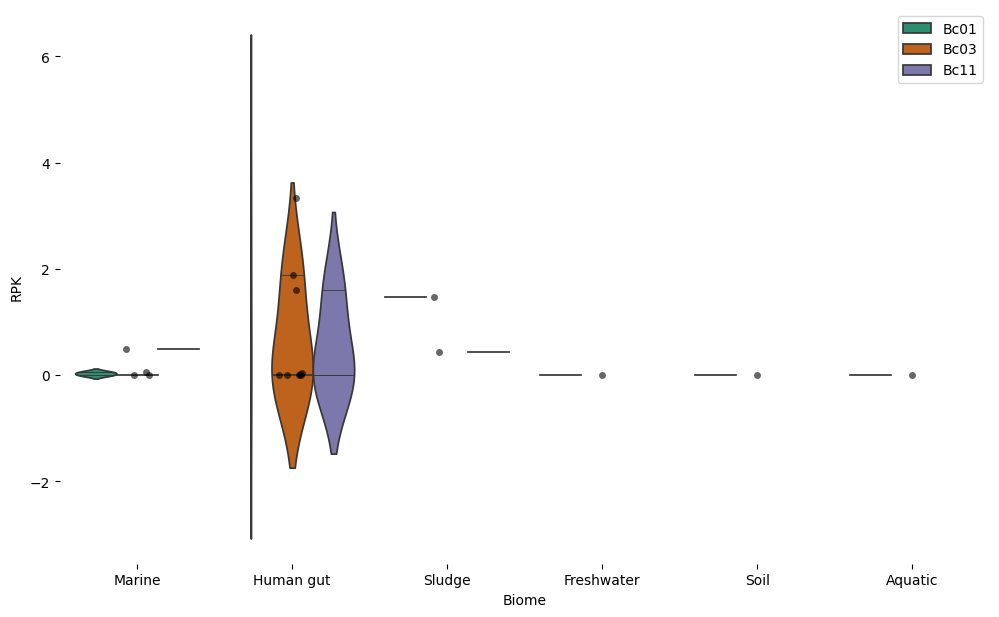

In [ ]:
figsize = (12, 1.2 * len(rpk_biome['Biome'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data=rpk_biome, x='Biome', y='RPK', hue='Phage', inner='stick', palette='Dark2')
sns.stripplot(data=rpk_biome, x='Biome', y='RPK',jitter=True, color='k', alpha=0.6)
sns.despine(top=True, right=True, bottom=True, left=True)

# Plotting bacterial phyla

The data set [phylum.tsv.gz](https://github.com/linsalrob/ComputationalGenomicsManual/raw/master/Python/phylum.tsv.gz) has the abundance of a few bacterial phyla across a bunch of different samples. This is a real data set that we generated in my group.

Let's take a look at a couple of different ways to plot the data.

First, we read the dataframe in, again here we are just slurping it straight from GitHub, but feel free to download it and upload it to your Google Colab instance.


In [44]:
# phyla = pd.read_csv("phylum.tsv.gz", sep="\t", compression='gzip')
phyla = pd.read_csv("https://github.com/linsalrob/ComputationalGenomicsManual/raw/master/Python/phylum.tsv.gz", sep="\t", compression='gzip')
phyla.set_index('NAME', inplace=True)
phyla

,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9,Sample 10,...,Sample 53,Sample 54,Sample 55,Sample 56,Sample 57,Sample 58,Sample 59,Sample 60,Sample 61,Sample 62
NAME,,,,,,,,,,,,,,,,,,,,,
p__Parvarchaeota,0,3,10,0,6,0,17,2,0,0,...,0,0,7,18,4,2,0,1,2,0
p__Gracilibacteria,4,5,7,1,118,0,13,3,0,5,...,26,10,5,4,3,0,4,9,8,24
p__Ctenophora,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
p__Elusimicrobia,174,1127,724,38,1031,27,374,46,1,240,...,372,577,471,1073,77,100,109,223,294,249
p__Amesbacteria,8,76,30,1,49,6,88,9,2,6,...,38,10,14,8,4,4,5,1,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p__Fraserbacteria,49,891,125,20,383,8,106,10,4,114,...,53,71,55,106,11,8,5,9,48,16
p__Hydrogenedentes,65,641,549,36,230,31,229,47,0,165,...,255,386,157,210,45,35,1285,121,250,299
p__Ratteibacteria,0,10,9,0,0,0,11,0,0,0,...,3,0,16,44,0,2,0,0,6,1


# Plotting the phyla

Usually, people like to use stacked bar charts. Lets make a stacked bar chart of this data and see if we can see some trends.

<Axes: xlabel='NAME'>

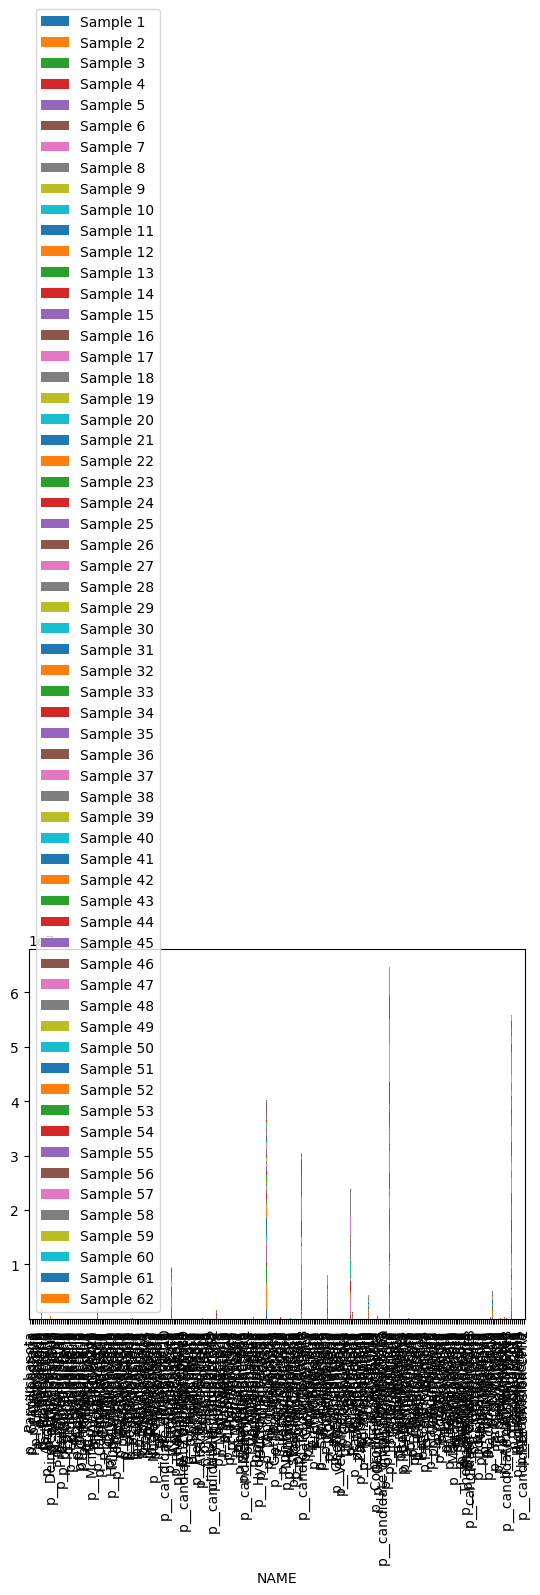

In [51]:
phyla.plot(kind="bar", stacked=True)

This plot is the wrong way around! We have the bacteria along the x-axis and the samples as the stacked bars. Who knows what is happening! Lets transpose it and plot again

<Axes: >

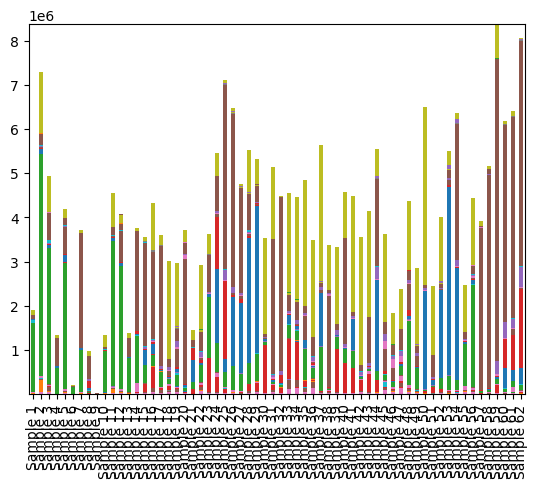

In [45]:
phyla.T.plot(kind="bar", stacked=True, legend=None)

That's still really horrible, so lets take a look at the [seaborn example plots](https://seaborn.pydata.org/examples/index.html) and see if we can come up with a better idea!

## Heatmap

Let's try a heatmap of this data to see what it looks like. We also fiddle with the image size to make it bigger, and add `tight_layout()` (which you should always add to a figure, it almost always makes it look better!)

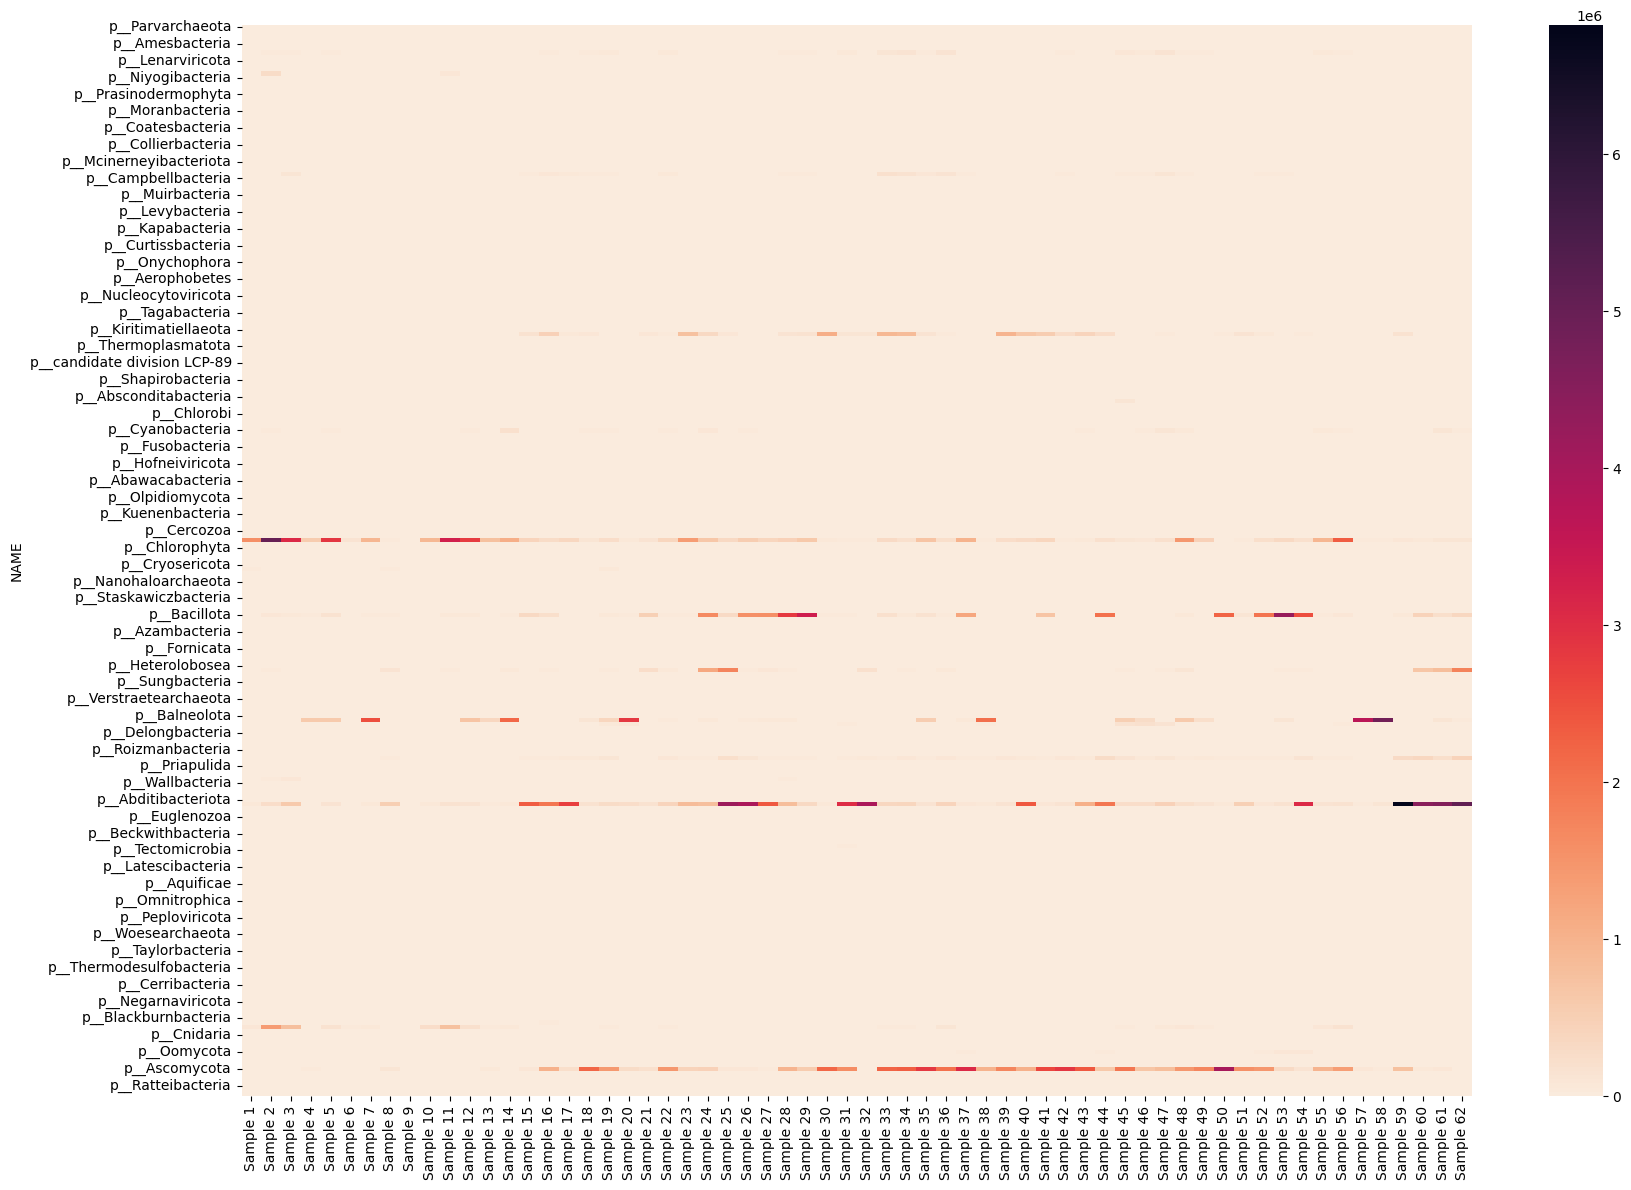

In [50]:
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(data=phyla, cmap='rocket_r')
plt.tight_layout()

[Return to the lesson listing](#lessons)

[Return to the top of the notebook](#top)